# Исследование данных о российском кинопрокате


**Описание проекта**

Используя данные государственного портала и сервиса “КиноПоиск”, необходимо провести исследование рынка российского кинопроката.


**Описание данных**

`title` — название фильма;

`puNumber` — номер прокатного удостоверения;

`show_start_date` — дата премьеры фильма;

`type` — тип фильма;

`film_studio` — студия-производитель;

`production_country` — страна-производитель;

`director` — режиссёр;

`producer` — продюсер;

`age_restriction` — возрастная категория;

`refundable_support` — объём возвратных средств государственной поддержки;

`nonrefundable_support` — объём невозвратных средств государственной поддержки;

`financing_source` — источник государственного финансирования;

`budget` — общий бюджет фильма;

`ratings` — рейтинг фильма на КиноПоиске;

`genres` — жанр фильма.

**Цель проекта**

Изучить рынок российского кинопроката и выявить текущие тренды.

## 1. Обзор данных.


Импортируем библиотеки. Считаем данные из csv-файлов в датафрейм и сохраним в переменные data и data_shows. Выведем первые 5 строк каждой из таблиц.

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.float_format', '{:,.2f}'.format)
pd.set_option('chained_assignment', None)

In [ ]:
data = pd.read_csv('/datasets/mkrf_movies.csv')
data.head(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [ ]:
data_shows = pd.read_csv('/datasets/mkrf_shows.csv')
data_shows.head(5)

,puNumber,box_office
0,111000113,"2,450.00"
1,111000115,"61,040.00"
2,111000116,"153,030,013.40"
3,111000117,"12,260,956.00"
4,111000118,"163,684,057.79"


Посмотрим общую информацию о полученных датафреймах с помощью метода info()

In [ ]:
data.info()
print()
data_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

Объединять таблицы мы будем по столбцу `puNumber`, однаком видим, что данный столбец имеет разный тип данных, поэтому преобразуем в датасете mkrf_shows данный стобец в строковый тип

In [ ]:
data_shows['puNumber'] =  data_shows['puNumber'].astype('str')
data_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   object 
 1   box_office  3158 non-null   float64
dtypes: float64(1), object(1)
memory usage: 49.5+ KB


In [ ]:
data = data.merge(data_shows, how='outer')

In [ ]:
data.head(10) #проверим, что получилось

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия","2,700.00"
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия",NaN
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал",NaN
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

**Промежуточный вывод**

Перед объединением мы увидели, что в датафрейме mkrf_movies содержалось 7486 строк и 15 столбцов, в датафрейме mkrf_shows 3158 строк и 2 столбца. Объединение мы производили по общему столбцу `puNumber`, после объединения мы видим, что в датафрейме содержится 7486 строк и 16 столбцов +новый стобец из  mkrf_shows `box_office`,содержащий 3158 строк. Таким образом, при объединении данных у нас ничего не потерялось.

Пропущены значения в следующих столбцах:

- producer
- refundable_supportl
- nonrefundable_support
- budget
- financing_source
- ratings
- genres
- box_office


## 2. Предобработка данных

### 2.1. Типы данных


Сразу приведем наименование столбца `puNumber` к змеиному регистру.

In [ ]:
data = data.rename(columns={'puNumber' : 'pu_number'})

Посмотрим на характеристики данных

In [ ]:
data.describe()

,refundable_support,nonrefundable_support,budget,box_office
count,332.00,332.00,332.00,"3,158.00"
mean,"11,864,457.83","48,980,988.89","127,229,716.68","76,478,696.16"
std,"24,916,555.26","59,980,117.92","188,588,333.12","240,353,122.82"
min,0.00,0.00,0.00,0.00
25%,0.00,"25,000,000.00","42,000,000.00","86,239.00"
50%,0.00,"30,000,000.00","68,649,916.00","2,327,987.55"
75%,"15,000,000.00","40,375,000.00","141,985,319.50","23,979,671.02"
max,"180,000,000.00","400,000,000.00","2,305,074,303.00","3,073,568,690.79"


Типы данных мы видим из общей информации, полученной ранее.
Так, для столбца `show_start_date` заменим тип данных на `datetime` и отбросим время.

In [ ]:
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%dT%H:%M:%S.%fZ')
data['show_start_date'] = data['show_start_date'].dt.round('1d')
data['show_start_date']

0      2015-11-27
1      2016-09-14
2      2016-10-10
3      2016-06-10
4      2015-07-30
          ...    
7481   2019-12-24
7482   2019-12-24
7483   2019-12-28
7484   2019-12-30
7485   2019-12-30
Name: show_start_date, Length: 7486, dtype: datetime64[ns]

Столбец `raitings` - рейтинг фильма должен содержать в себе цифры с точкой, посмотрим, какие данные еще есть в нем.

In [ ]:
raitings_other = data[data['ratings'].str.contains('[^0-9.]').fillna(False)]
raitings_other

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
259,Прошлое,221030715,2015-07-30,Художественный,"20 Сенчюри Фокс де Архентина, Чемо, ЭйчБи Филм...",Аргентина - Бразилия,Эктор Бабенко,"Эктор Бабенко, Оскар Крамер, Хуго Сидмэн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,99%,"ужасы,триллер,драма",NaN
811,От винта!,114000212,2012-08-06,Анимационный,"ЗАО ""Продюсерский центр ""Парадиз""",Россия,О.Лопато,"Г.Нерсисян, А.Манасарян, А.Нерсесян",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,28%,"детский,приключения,комедия","1,740.00"
1053,Песочный человек,121029212,2012-11-30,Художественный,Спотлайт Медиа Продакшн,Швейцария,Питер Луизи,"Дэвид Луизи, Питер Луизи",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,97%,"ужасы,фантастика,фэнтези",NaN
1341,Сказка о добре и Вре,111008913,2013-11-15,Художественный,"НП ""Студия игрового кино ""Лик""",Россия,Е.Шиляева,К.Терещенко,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,99%,"триллер,драма,детектив",NaN
1805,Спираль.,111001014,2014-01-30,Художественный,"ООО ""Компания Питон""",Россия,А.Волгин,Е.Ковалева,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,99%,"аниме,мультфильм,ужасы","4,295.00"
1874,Короткие истории о любви 2,121002615,2015-02-14,Художественный,"Кавиар, Курт 13, СтритЛайт Филмз, Нэйер Дойче ...",Нидерланды - США - Германия - Канада - Франция...,"Мэтью Аувро, Лео Брайдл, Бен Бренд, Ден Кларк,...","Мэри Пэт Бентел, Бен Бренд, Сиара Гиллан, Джор...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,83%,NaN,"1,429,859.00"
1899,Золушка /По сказке Шарля Перро/. Холодное торж...,121003615,2015-02-28,Художественный,"Женр Филмз, Уолт Дисней Пикчерз",США,Кеннет Брана,"Дэвид Бэррон, Саймон Кинберг, Эллисон Ширмур",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,64%,"мюзикл,фэнтези,мелодрама","528,732,557.70"
2126,Поездка к матери,111002015,2015-03-02,Художественный,"ЗАО ""Киностудия ""М""-Фильм""",Россия,М.Косырев-Нестеров,М.Косырев-Нестеров,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,91%,"драма,семейный",0.00
2146,Главный,111003415,2015-03-28,Художественный,"ООО ""Киностудия ""МАСТЕР""",Россия,Ю.Кара,Ю.Кара,«6+» - для детей старше 6 лет,0.00,"10,000,000.00","40,000,000.00",Министерство культуры,94%,"фантастика,боевик,комедия","334,750.00"
2438,Самый рыжий Лис,111012715,2015-07-30,Художественный,"ООО ""Продюсерский центр ""Ленфильм""",Россия,А.Стреляная,"А.Котелевский, Э.Пичугин",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,62%,"фэнтези,семейный",NaN


Видим, что в данном столбце хранятся данные в процентах. Перепишем проценты как доли от 10 баллов.

In [ ]:
data.loc[raitings_other.index, 'ratings'] = raitings_other['ratings'].str[0] + '.' + raitings_other['ratings'].str[1]
data['ratings'].unique()# проверим все уникальные значения

### 2.2. Пропуски в датафрейме



Выведем количество пропущенных значений для каждого столбца и посмотрим пропуски на тепловой карте

In [ ]:
temp = data.copy() # создаем копию датасета до преобразования
len(temp)

7486

title                       0
pu_number                   0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4328
dtype: int64

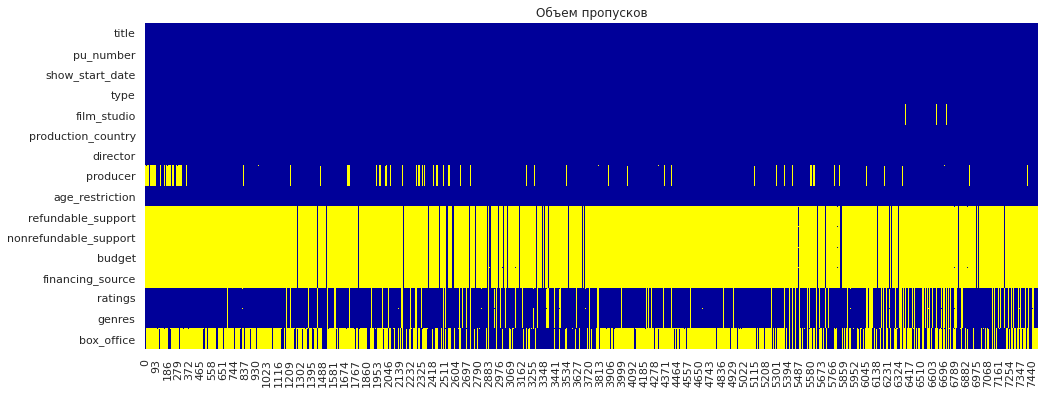

In [ ]:

df_nans = data.isna()
colours = ['#000099', '#ffff00'] # желтый - пропущенные данные, синий - не пропущенные
sns.set(rc = {'figure.figsize':(16,6)})
sns.heatmap(df_nans.transpose(), cbar=False, cmap=sns.color_palette(colours)).set_title('Объем пропусков')
data.isnull().sum()

In [ ]:
(data.isna().sum() / len(data)).round(4) * 100 # посмотрим на значения в процентах

title                    0.00
pu_number                0.00
show_start_date          0.00
type                     0.00
film_studio              0.24
production_country       0.03
director                 0.12
producer                 7.59
age_restriction          0.00
refundable_support      95.57
nonrefundable_support   95.57
budget                  95.57
financing_source        95.57
ratings                 12.92
genres                  13.04
box_office              57.81
dtype: float64

Видим, что пропуски в `refundable_support`, `nonrefundable_support`,  `budget`, `financing_source`, видимо это иностранные фильмы, не имеющие государственной поддержки. В таком случае, заменим отсутствующие данныые в столбцах `refundable_support` и `nonrefundable_support` на 0. бюджет и источник финансирования пока оставим как есть.

In [ ]:
data['refundable_support'] = data['refundable_support'].fillna(value=0)
data['nonrefundable_support'] = data['nonrefundable_support'].fillna(value=0)

В столбце `production_country` есть два пустых значения, в стобце `director` - девять,  поскольку они не влияют на ход исследования и их доля мала, удалим незаполненые строки в данных столбцах

In [ ]:
data = data.dropna(subset=['production_country']) #удалим строки
data['production_country'].describe() # посмотрим на результат

count     7484
unique     950
top        США
freq      2172
Name: production_country, dtype: object

Тоже самое сделаем со столбцом `director`

In [ ]:
data = data.dropna(subset=['director']) #удалим строки
data['director'].describe() # посмотрим на результат

count           7476
unique          4810
top       О.Семёнова
freq              47
Name: director, dtype: object

Заменим все пропущенные значения в столбце `genres` на значение "без жанра", `financing_source` на "без источника", `producer` на "без продюссера", `ratings` на "без рейтинга".

In [ ]:
data["genres"].fillna("no genres", inplace = True)

In [ ]:
data["financing_source"].fillna("без источника", inplace = True)

In [ ]:
data["producer"].fillna("без продюссера", inplace = True)

In [ ]:
data["ratings"].fillna("без рейтинга", inplace = True)

Пропуски в столбце `box_office` связаны с тем, что в датафрейме mkrf_shows с данным столбцом, изначально содержалось на 4328 строки меньше. Эти данные мы ни откуда взять не может, трогать их не будем.

In [ ]:
# проверка датасета после преобразования
a, b = len(temp), len(data)
print(len(temp), len(data), round((a-b)/a*100, 2))

7486 7476 0.13


### 2.3. Дубликаты в датафрейме


Проверим данные на явные дубликаты

In [ ]:
print('Количество дублирующихся строк:', data.duplicated().sum())

data.nunique()

Количество дублирующихся строк: 0


title                    6762
pu_number                7474
show_start_date          1375
type                        8
film_studio              5485
production_country        950
director                 4810
producer                 5345
age_restriction             5
refundable_support         34
nonrefundable_support      75
budget                    290
financing_source            4
ratings                    85
genres                    743
box_office               2936
dtype: int64

Явных дубликатов нет.
Наличие дубликатов в названиях фильмов может быть связано с тем, что данный фильм выходил в повторный прокат, или это ремейк фильма. Дата премьеры - в одну и ту же дату может выйти несколько фильмов, ну и все остальные дубликаты тоже логично объясняются тем, что несколько фильмов выходят в одной и той же стране, на одной и той же студии, один и тот же режиссер может снять несколько фильмов и т.д.


Поскольку прокатное удостоверение это документ, дающий право на прокат (демонстрацию) фильма на территории Российской Федерации, а также на его тиражирование и распространение, в том числе по кабельным или эфирным каналам, делаем вывод, что прокатное удостоверение должно быть уникальным.

Посмотрим неуникальные значения в `pu_number`

In [ ]:
data.loc[data['pu_number'].duplicated(keep=False)]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310,2010-12-17,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,0.00,0.00,NaN,без источника,7.0,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,0.00,0.00,NaN,без источника,7.6,"драма,мелодрама,история",NaN
5067,Анализируй это!,221054410,2010-05-25,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,0.00,0.00,NaN,без источника,7.4,"комедия,криминал",NaN
5068,Анализируй то!,221054410,2010-05-25,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,0.00,0.00,NaN,без источника,6.8,"комедия,криминал",NaN


In [ ]:
data = data.drop_duplicates(subset=['pu_number'], keep='first') #удалим неуникальные значения по столбцу puNumber

Проверим на неявные дубликаты столбец `title` и выведем их количество

In [ ]:
duplicates = data[data.duplicated(subset=['title'], keep=False)]
duplicates

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2,Особо опасен,221038416,2016-10-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,NaN,без источника,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,NaN,без источника,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-30,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,NaN,без источника,6.8,"фантастика,боевик,триллер",NaN
12,Малышка на миллион /По мотивам рассказов Ф.Х.Т...,221011415,2015-04-03,Художественный,"Уорнер Бразерс, Лейкшор Интертейнмент, Малпасо...",США,Клинт Иствуд,"Клинт Иствуд, Том Розенберг, Альберт С.Рудди, ...",«16+» - для детей старше 16 лет,0.00,0.00,NaN,без источника,8.1,"драма,спорт",NaN
26,Оружейный барон,221012515,2015-04-03,Художественный,"Вэ И Пэ Медиенфондс 3, Асендант Пикчерз, Сатур...",США - Франция - Турция,Эндрю Никкол,"Норман Голуайтли, Энди Грош, Николас Кейдж, Эн...",«18+» - запрещено для детей,0.00,0.00,NaN,без источника,7.7,"боевик,драма,криминал",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7369,Невиновен,111019319,2019-11-08,Художественный,"ООО ""Кавказфильм""",Россия,А.Емкужев,"А.Емкужев, А.Хуажева, ООО ""Корпорация Русская ...",«16+» - для детей старше 16 лет,0.00,0.00,NaN,без источника,7.5,"триллер,детектив,криминал",NaN
7416,"Отель ""Гранд Будапешт""",121035119,2019-12-14,Художественный,"Американ Эмпирикал, Индиан Пэинтбраш, Скотт Ру...","Германия, США",Уэс Андерсен,"Уэс Андерсон, Джереми Доусон, Стивен Рейлс",«16+» - для детей старше 16 лет,0.00,0.00,NaN,без источника,7.9,"комедия,приключения,детектив",NaN
7438,Зверь,121035919,2019-12-06,Художественный,Студио энд Нью,Южная Корея,Ли Джон-хо,"Чан Гён-ик, Чон Джи-хун, Пэк Кён сук",«18+» - запрещено для детей,0.00,0.00,NaN,без источника,6.5,"триллер,драма","175,003.51"
7450,В тихом омуте,121036919,2019-12-10,Художественный,"Хэд Гир Филмз, Крео Филмз, Локал Хироу, Метрол...",США,Адам Рэндолл,Мэтт Уолдек,«18+» - запрещено для детей,0.00,0.00,NaN,без источника,6.8,"триллер,криминал,детектив",NaN


In [ ]:
num_duplicates = duplicates.shape[0]
print(f'Количество неявных дубликатов в столбце "title": {num_duplicates}')

Количество неявных дубликатов в столбце "title": 1271


### 2.4. Категориальные значения

Уберем возможно лишние пробелы между списками внутри ячейки

In [ ]:
def join_values(values):
    return ', '.join([value.strip() for value in values.split(',')])
for column in ['director', 'producer', 'film_studio', 'genres']:
    print('уникальные значения в', column)
    print('   было', data[column].nunique())
    data[column] = data[column].dropna().apply(join_values)
    print('  стало', data[column].nunique())
    print()

уникальные значения в director
   было 4809
  стало 4798

уникальные значения в producer
   было 5344
  стало 5328

уникальные значения в film_studio
   было 5484
  стало 5455

уникальные значения в genres
   было 743
  стало 743



Посмторим на значения в столбцах.

In [ ]:
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

Видим, что есть несколько значений с пробелом в начале строки, устраним их.

In [ ]:
data['type'] = data['type'].str.strip()
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

In [ ]:
data['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

In [ ]:
data['financing_source'].unique()

array(['без источника', 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

In [ ]:
data['film_studio'].unique()

array(['Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз',
       'Киностудия "Мосфильм"',
       'Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз',
       ...,
       'Дэниел Гродник Продакшнз, Вандерфилм Медиа Корпорэйшн, Импринт Интертейнмент, Вор Хорс Интертейнмент, Пимиента',
       'Никелодеон Анимейшн Студиос, Спин Мастер',
       'Анимаккорд Лтд., ООО Студия "АНИМАККОРД"'], dtype=object)

In [ ]:
data['title'].unique()

array(['Открытый простор', 'Особо важное задание', 'Особо опасен', ...,
       'Щенячий патруль: Скорей спешим на помощь!',
       'Машины песенки. Серия "Испанские мотивы"',
       'Машины песенки. Серия "Когда цветут кактусы"'], dtype=object)

In [ ]:
data['producer'].unique()

array(['Дэвид Валдес, Кевин Костнер, Джейк Эбертс', 'без продюссера',
       'Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит', ...,
       'Поппи Бегум, Ник Пойнц',
       'Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэт Саксон, Кирк Шоу',
       'Дженнифер Додж'], dtype=object)

In [ ]:
data['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', 'без рейтинга', '8.2', '7.5', '6.7', '7.9', '5.9',
       '6.2', '5.6', '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8',
       '5.5', '5.1', '5.7', '5.4', '9.9', '4.4', '4.5', '5.3', '4.1',
       '8.4', '2.6', '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2',
       '5.2', '4.7', '4.9', '3.9', '2.7', '3.3', '2.9', '2.8', '3.7',
       '1.4', '3.1', '9.7', '3.5', '3.2', '1.5', '2.1', '2.5', '9.2',
       '3.4', '1.1', '3.6', '9.1', '9.4', '9.0', '1.9', '1.0', '8.9',
       '1.3', '1.8', '1.2', '1.7', '9.8'], dtype=object)

In [ ]:
data['genres'].unique()

array(['боевик, драма, мелодрама', 'драма, военный',
       'фантастика, боевик, триллер', 'драма', 'мелодрама, комедия',
       'мюзикл, мелодрама, комедия', 'комедия, криминал',
       'боевик, триллер, детектив', 'боевик, драма, приключения',
       'драма, спорт', 'триллер, драма, мелодрама', 'комедия, мелодрама',
       'драма, мелодрама, комедия', 'драма, мелодрама', 'драма, история',
       'драма, мелодрама, семейный', 'комедия, мелодрама, криминал',
       'комедия', 'боевик, драма, криминал', 'драма, комедия',
       'ужасы, фантастика, комедия',
       'мультфильм, короткометражка, мелодрама', 'драма, криминал',
       'мультфильм, фантастика, фэнтези', 'триллер, драма, криминал',
       'драма, мелодрама, биография', 'драма, комедия, военный',
       'фантастика, драма, детектив', 'мюзикл, семейный', 'no genres',
       'военный, приключения, драма', 'документальный, драма',
       'драма, биография, история', 'боевик, триллер, драма',
       'фэнтези, боевик', 'боевик, ком

В столбцах `genres`, `ratings`, `pu_number`, `producer`, `title`, `film_studio`, `financing_source`, `age_restriction` стало все хорошо.

Посмотрим на уникальные значения в столбце 'production_country' и выведем их количество

In [ ]:
print(data['production_country'].unique())
print()
print('Количество уникальных значений в столбце "production_country":', data['production_country'].nunique())

['США' 'СССР' 'Франция' 'СССР, Венгрия' 'Германия-Великобритания'
 'Великобритания - Италия' 'Чехословакия' 'США - Франция - Турция'
 'Новая Зеландия' 'Канада - Франция - Испания' 'США-Германия'
 'США - Великобритания' 'Великобритания' 'США - Германия'
 'Франция - Мексика - США' 'Россия, Казахстан, США' 'СССР, Швеция'
 'СССР, Франция, Англия, Куба, ГДР' 'Германия'
 'Великобритания-США-Германия-КНР' 'СССР, ЧССР, Западный Берлин, ПНР'
 'СССР, Италия' 'Гонконг, КНР' 'США - Франция'
 'США - Япония - Франция - Великобритания'
 'Гонконг - Сингапур - Таиланд - Великобритания' 'США-Канада'
 'Франция - Италия - Великобритания - США' 'Франция - США'
 'Ирландия-Великобритания-Германия' 'Чехия' 'США-Австралия'
 'СССР, Финляндия' 'США-Франция-Великобритания-Австрия' 'США - Бельгия'
 'США - Ирландия - Великобритания' 'Великобритания - США'
 'Люксембург - Нидерланды - Испания - Великобритания - США - Италия'
 'Великобритания - Франция - США' 'Новая Зеландия - США'
 'США - Великобритания - Чехия' 'Кан

Видим, что есть значения с пробелами, например, 'США-Германия' и 'США - Германия'. Уберем все пробелы в данном столбце и выведем количество уникальных значений после преобразования.

In [ ]:
data['production_country'] = data['production_country'].str.replace(' ', '')

In [ ]:
print(data['production_country'].nunique())

858


Вновь посмотрим на столбец 'pu_number'. как видим, в номер прокатного удостоверения содержит 9 символов, удалим те, что выбиваются из данной логики

In [ ]:
data['pu_number']
data[data['pu_number'].str.len() != 9]['pu_number']

804      111004112
1797           нет
4701       1811096
Name: pu_number, dtype: object

In [ ]:
data = data[data['pu_number'].str.len() == 9]


Общей проблемой в категориальных переменных является наличие в значениях лишних пробелов, которые мы удалили. Возможно это связано с погрешностями при выгрузке, что-то могло быть заполнено в ручную, либо данные были так сформатированы.

**Промежуточный вывод**

На данном этапе мы:
- изменили тип данных для столбца `show_start_date` и отбросили время;
- заменили проценты в столбце `ratings` на числа с точкой, как доли от 10 баллов и привели к числу;
- изучив пропуски, обнаружили, одинаковое количество пропусков в столбцах `refundable_support`, `nonrefundable_support`,  `budget`, `financing_source`, предположили, что это российские фильмы с государственной поддержкой и заменили пропущенные значения в `refundable_support`, `nonrefundable_support` на ноль;
- удалили пропущенные значения в столбцах `production_country` и `director`, пропущенные значения в `ganres` заменили на "без жанра", в `financing_sourse` - на "без источника";
- изучили дубликаты. Исходя из гипотезы, что прокатное удостоверенеие должно быть уникальным, удалили повторяющиеся значения в столбце `pu_number`;
- в категориальных переменных убрали лишние пробелы.
- выявили общую проблему в категориальных переменных, а именно наличие в значениях лишних пробелов, которые мы удалили. Возможно это связано с погрешностями при выгрузке, что-то могло быть заполнено в ручную, либо данные были так сформатированы.



### 2.5. Количественные значения


Посмотрим на распределение количественных значений в нашем датафрейме.

In [ ]:
data.describe()

,refundable_support,nonrefundable_support,budget,box_office
count,"7,471.00","7,471.00",332.00,"3,156.00"
mean,"527,238.66","2,176,641.46","127,229,716.68","76,527,086.06"
std,"5,786,861.37","16,164,847.43","188,588,333.12","240,421,600.77"
min,0.00,0.00,0.00,0.00
25%,0.00,0.00,"42,000,000.00","86,337.00"
50%,0.00,0.00,"68,649,916.00","2,334,076.95"
75%,0.00,0.00,"141,985,319.50","23,989,289.27"
max,"180,000,000.00","400,000,000.00","2,305,074,303.00","3,073,568,690.79"


Квартили нулевые `refundable_support` ,  `nonrefundable_support`, так как в данных столбцах у нас большое количество пропусков, как ранее уже отмечалось, данные пропуски возникают в той связи, что данные фильмы без госудраственной поддержки.

Посмотрим, нет ли у нас значений, где бюджет меньше, чем объем невозвращенный средств и объем возвратных средств

In [ ]:
bad_budget = data[data['budget'] < (data['refundable_support'] + data['nonrefundable_support'])]
bad_budget

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-20,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.00,"23,000,000.00",0.00,"Министерство культуры, Фонд кино",6.6,мелодрама,"10,234,016.10"
2058,Дуxless 2,111000415,2015-01-27,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"75,000,000.00",0.00,Фонд кино,6.6,драма,"446,163,511.00"
2472,Воин (2015),111017315,2015-09-28,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,"10,000,000.00","70,000,000.00",0.00,Фонд кино,7.8,"боевик, драма, криминал","196,572,438.40"
2532,Бармен.,111009615,2015-05-27,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,"20,000,000.00",0.00,0.00,Фонд кино,6.2,"комедия, фэнтези","67,418,974.80"
2615,Савва. Сердце воина,114001715,2015-07-22,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,"60,000,000.00","100,000,000.00",0.00,Фонд кино,4.6,"мультфильм, приключения, фэнтези","184,487,551.40"
2684,Тряпичный союз,111010215,2015-06-08,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.00,"59,000,000.00",0.00,Фонд кино,6.3,"комедия, драма","1,957,738.51"
2788,Срочно выйду замуж,111017115,2015-09-30,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"35,000,000.00",0.00,Фонд кино,5.1,"комедия, мелодрама","72,937,783.20"
2874,Помню - не помню!,111004916,2016-03-02,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.00,"6,000,000.00",0.00,Министерство культуры,4.3,комедия,"15,362,931.43"
3047,Любовь с ограничениями,111008216,2016-04-29,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,"19,000,000.00","51,000,000.00",0.00,Фонд кино,6.3,"комедия, мелодрама","70,299,052.00"
3565,Притяжение (2016),111018116,2016-12-17,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.00,"250,000,000.00",0.00,Фонд кино,5.6,фантастика,"1,038,321,489.00"


Мы видим, что есть фильмы, получившие господдержку, но с бюджетом 0. Поскольку для фильмов с господдержкой budget  не может быть равен нулю и не может быть меньше суммы возвратных и невозвратных средств, выясним в каком объёме обычно оказывалась поддержка и заменим средним процентом от поддержки. Суммируем оба вида господдержки.

Доля участия государства в бюджете составляет в среднем 0.6140376284219444



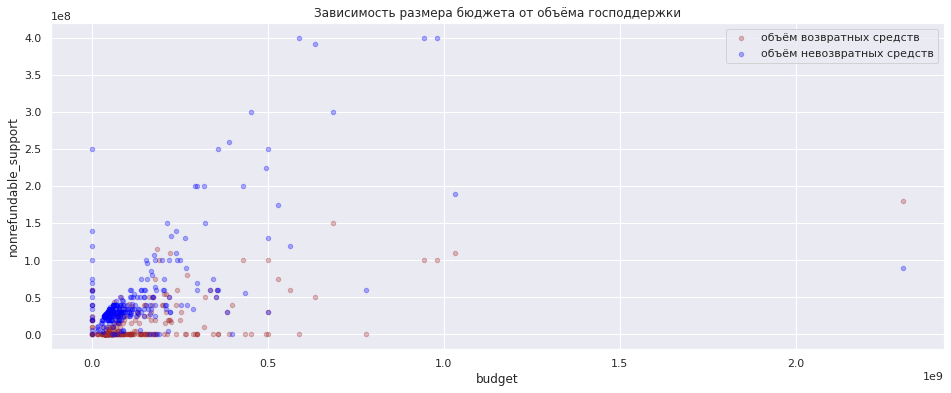

In [ ]:
ax = data.plot.scatter(
    title='Зависимость размера бюджета от объёма господдержки',
    label='объём возвратных средств',
    x='budget',
    y='refundable_support',
    color='brown',
    alpha=0.3

)

data.plot.scatter(
    label='объём невозвратных средств',
    x='budget', y='nonrefundable_support',
    color='blue',
    alpha=0.3,
    ax=ax)

data['support_percentage'] = ((data['refundable_support'] + data['nonrefundable_support']) / data['budget'])
support_percentage = (data['support_percentage'].median())

print('Доля участия государства в бюджете составляет в среднем', data['support_percentage'].median())
print()

In [ ]:
data

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,support_percentage
0,Открытый простор,221048915,2015-11-27,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0.00,0.00,NaN,без источника,7.2,"боевик, драма, мелодрама",NaN,NaN
1,Особо важное задание,111013716,2016-09-14,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,без продюссера,«6+» - для детей старше 6 лет,0.00,0.00,NaN,без источника,6.6,"драма, военный",NaN,NaN
2,Особо опасен,221038416,2016-10-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,NaN,без источника,6.8,"фантастика, боевик, триллер",NaN,NaN
3,Особо опасен,221026916,2016-06-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,NaN,без источника,6.8,"фантастика, боевик, триллер",NaN,NaN
4,Особо опасен,221030815,2015-07-30,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,NaN,без источника,6.8,"фантастика, боевик, триллер",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7481,Сад художника: Американский импрессионизм,126008019,2019-12-24,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,0.00,0.00,NaN,без источника,без рейтинга,no genres,NaN,NaN
7482,Звериная ярость,121037819,2019-12-24,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,0.00,0.00,NaN,без источника,5.4,"боевик, триллер",NaN,NaN
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США-Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,0.00,0.00,NaN,без источника,без рейтинга,no genres,NaN,NaN
7484,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","РеспубликаКипр,Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,0.00,0.00,NaN,без источника,без рейтинга,no genres,NaN,NaN


In [ ]:
data.loc[bad_budget.index, 'budget'] = (data.loc[bad_budget.index, 'refundable_support'] + data.loc[bad_budget.index, 'nonrefundable_support']) / support_percentage

data.loc[bad_budget.index]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,support_percentage
2053,14+,111023614,2014-12-20,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.00,"23,000,000.00","37,456,987.87","Министерство культуры, Фонд кино",6.6,мелодрама,"10,234,016.10",inf
2058,Дуxless 2,111000415,2015-01-27,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"75,000,000.00","122,142,351.75",Фонд кино,6.6,драма,"446,163,511.00",inf
2472,Воин (2015),111017315,2015-09-28,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,"10,000,000.00","70,000,000.00","130,285,175.20",Фонд кино,7.8,"боевик, драма, криминал","196,572,438.40",inf
2532,Бармен.,111009615,2015-05-27,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,"20,000,000.00",0.00,"32,571,293.80",Фонд кино,6.2,"комедия, фэнтези","67,418,974.80",inf
2615,Савва. Сердце воина,114001715,2015-07-22,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,"60,000,000.00","100,000,000.00","260,570,350.41",Фонд кино,4.6,"мультфильм, приключения, фэнтези","184,487,551.40",inf
2684,Тряпичный союз,111010215,2015-06-08,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.00,"59,000,000.00","96,085,316.71",Фонд кино,6.3,"комедия, драма","1,957,738.51",inf
2788,Срочно выйду замуж,111017115,2015-09-30,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"35,000,000.00","56,999,764.15",Фонд кино,5.1,"комедия, мелодрама","72,937,783.20",inf
2874,Помню - не помню!,111004916,2016-03-02,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.00,"6,000,000.00","9,771,388.14",Министерство культуры,4.3,комедия,"15,362,931.43",inf
3047,Любовь с ограничениями,111008216,2016-04-29,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,"19,000,000.00","51,000,000.00","113,999,528.30",Фонд кино,6.3,"комедия, мелодрама","70,299,052.00",inf
3565,Притяжение (2016),111018116,2016-12-17,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.00,"250,000,000.00","407,141,172.51",Фонд кино,5.6,фантастика,"1,038,321,489.00",inf


Заполнили пустые значения бюджета как сумму возвратных и невозвратных средств, деленную на процент поддержки, присвоив новые значения бюджета с теми же индексами.

Изучим столбец `box_office`

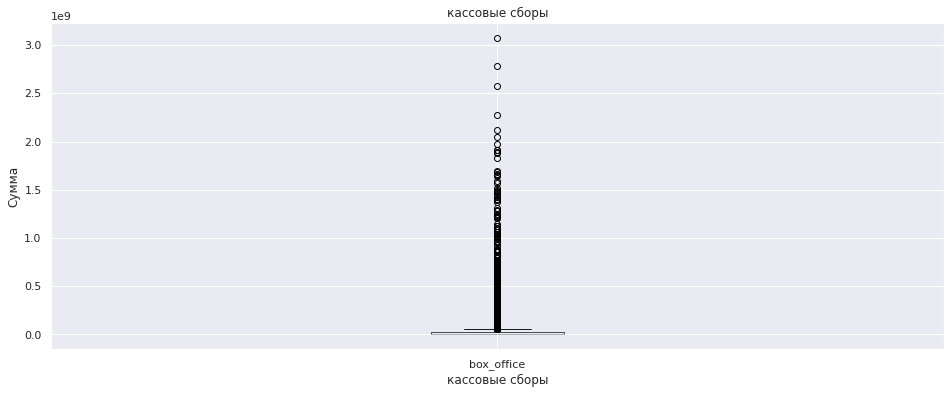

In [ ]:
data.boxplot(column=['box_office']) # посмотрим на диаграмму размаха
plt.xlabel('кассовые сборы')
plt.ylabel('Сумма')
plt.title('кассовые сборы')

plt.show()

In [ ]:
data['box_office'].describe()

count           3,156.00
mean       76,527,086.06
std       240,421,600.77
min                 0.00
25%            86,337.00
50%         2,334,076.95
75%        23,989,289.27
max     3,073,568,690.79
Name: box_office, dtype: float64

Есть фильмы со сборами в рублях - 0, возможно, они не показывались в кинотеатрах или он-лайн кинотеатрах, максимальные сборы - 3073568691 рублей, медиана - 76527090 рублей, среднее - 2334077 рублей. такое различие между медианой и средним связано с тем, что в данном столбце много пропущенных значений. Выбросы

In [ ]:
# проверка датасета после преобразования (размер до, размер после, процент изменений)
a, b = len(temp), len(data)
print(len(temp), len(data), round((a-b)/a*100, 2))

7486 7471 0.2


### 2.6. Новые столбцы





Создадим столбец с информацией о годе прокатав, выделив год из даты премьеры фильма.

In [ ]:
data['year'] = data['show_start_date'].dt.year

Создадим два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

In [2]:
#напишем функцию для создания новых столбцов
def add_main(data, columns):
    for column in columns:
        data[f'main_{column}'] = data[column].dropna().apply(lambda x: x.split(', ')[0])
    return data


In [ ]:
data = add_main(data, ['director', 'genres'])

In [ ]:
data.head(5)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,support_percentage,year,main_director,main_genres
0,Открытый простор,221048915,2015-11-27,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0.00,0.00,NaN,без источника,7.2,"боевик, драма, мелодрама",NaN,NaN,2015,Кевин Костнер,боевик
1,Особо важное задание,111013716,2016-09-14,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,без продюссера,«6+» - для детей старше 6 лет,0.00,0.00,NaN,без источника,6.6,"драма, военный",NaN,NaN,2016,Е.Матвеев,драма
2,Особо опасен,221038416,2016-10-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,NaN,без источника,6.8,"фантастика, боевик, триллер",NaN,NaN,2016,Тимур Бекмамбетов,фантастика
3,Особо опасен,221026916,2016-06-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,NaN,без источника,6.8,"фантастика, боевик, триллер",NaN,NaN,2016,Тимур Бекмамбетов,фантастика
4,Особо опасен,221030815,2015-07-30,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,NaN,без источника,6.8,"фантастика, боевик, триллер",NaN,NaN,2015,Тимур Бекмамбетов,фантастика


**Промежуточные выводы**

На данном этапе мы:
- выявили фильмы, получившие государственную поддержку, но с бюджетом 0, заменили средним процентом от государственной поддержки;

- поскольку номер прокатного удостоверения содержит 9 цифр, удалили выбивающиеся значения;
- с помощью диаграммы размаха выявили, что медиана столбца `box_office` сотавляет 76527090, среднее значение - 2334077, такое различие возможно из-за наличия в столбце множества пропущенных значений, масимальные сборы 3073569000 рублей, минимальные - 0. Возможно, на данные фильмы были выданы прокатные удостоверения, и они не показывались в кинотеатрах или онлайн кинотеатрах;
- обнаружили, что чаще всего доля участия государства в поддержке фильмов составляет 0.6, заменили недостающие значения медианным значением.
- добавили четыре новых столбца: информация о годе фильма, имя режиссера, основной жанр фильма, доля государственной поддержки.

## 3. Исследовательский анализ данных


Посмотрим, сколько фильмов выходило в прокат каждый год.

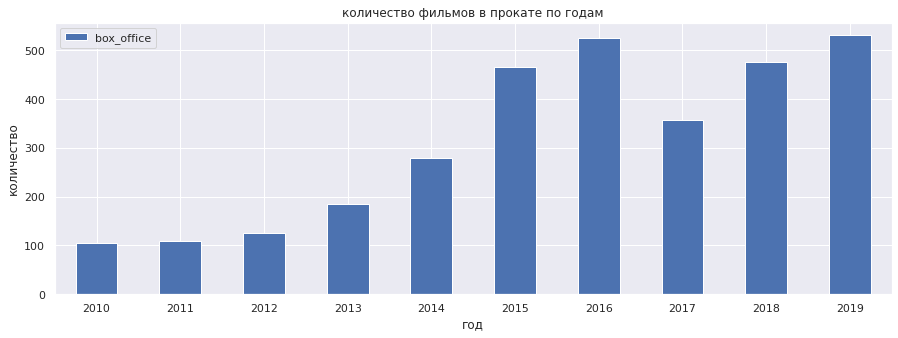

In [ ]:
(
    data.groupby('year').agg({'box_office':'count'})
    .plot(kind='bar', grid=True, figsize=(15, 5), alpha=1, rot=0)
)
plt.xlabel('год')
plt.ylabel('количество')
plt.title('количество фильмов в прокате по годам')
plt.show()


Количество выходящих фильмов увеличивалось с 2012 по 2016 год, в 2017 году фильмов выходило меньше, с 2018 года количество фильмов вновь увеличилось.

Создадим сводную таблицу с количеством фильмов, общей суммой бюджета, средним значением и медианой по годам

In [ ]:
data_pivot = pd.pivot_table(data.loc[data['box_office'].notna(), ['year', 'box_office']],
                            index='year',
                            values='box_office',
                            aggfunc=['count', 'sum', 'mean', 'median'])


data_pivot.columns = ['count', 'sum', 'mean', 'median']

In [ ]:
data_pivot

,count,sum,mean,median
year,,,,
2010,105,"2,428,654.00","23,130.04","1,700.00"
2011,109,"14,102,765.00","129,383.17","3,000.00"
2012,126,"6,910,523.00","54,845.42","5,660.00"
2013,185,"29,800,256.20","161,082.47","3,500.00"
2014,279,"7,444,951,859.20","26,684,415.27","18,160.00"
2015,465,"39,497,365,196.40","84,940,570.31","4,920,933.00"
2016,525,"47,866,105,214.91","91,173,533.74","3,915,041.02"
2017,357,"48,563,707,217.51","136,032,793.33","9,968,340.00"
2018,475,"49,668,403,134.32","104,565,059.23","8,891,102.21"


In [ ]:
print(f'Доля фильмов, для которых есть информация о сборах: {data.box_office.notna().mean():.2f}') # форматируем как десятичную дробь с двумя знаками после запятой.

Доля фильмов, для которых есть информация о сборах: 0.42


Изучим, как менялась динамика проката по годам.

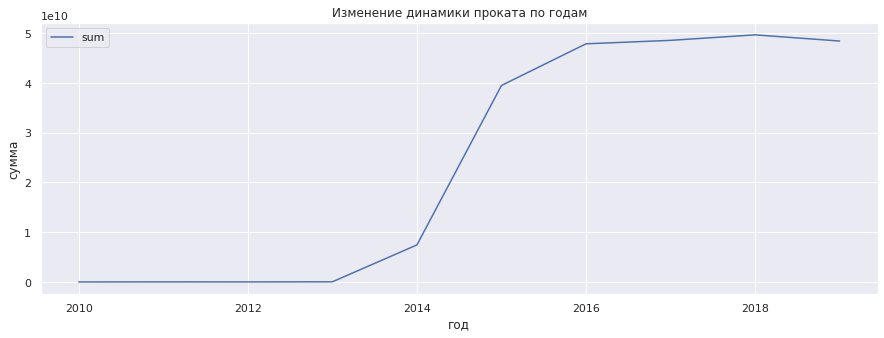

Сумма сборов была минимальной в 2010 году. Сумма сборов была максимальной в 2018 году.


In [ ]:
data_pivot.plot(kind='line', y='sum', grid=True, figsize=(15, 5), alpha=1)
plt.title('Изменение динамики проката по годам')
plt.xlabel('год')
plt.ylabel('сумма')
plt.show()
print(f"Сумма сборов была минимальной в {data_pivot['sum'].idxmin()} году. Сумма сборов была максимальной в {data_pivot['sum'].idxmax()} году.")


С помощью сводной таблицы посчитаем среднюю и медианную сумму сборов для каждого года.

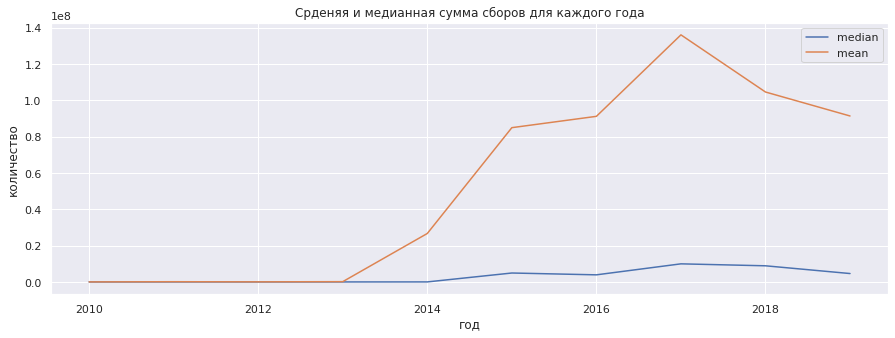

In [ ]:
data_pivot.plot(kind='line', y=['median', 'mean'], grid=True, figsize=(15, 5), alpha=1)
plt.title('Срденяя и медианная сумма сборов для каждого года')
plt.xlabel('год')
plt.ylabel('количество')
plt.show()

С 2010 по 2019 года суммы за сборы увеличивались. не смотря на то, что среднее значение измениось, медиана осталась практически неизменной. Такой разброс может быть связан с несколькими успешными проектами, и большого числа "средних" фильмов.

Определим, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года?

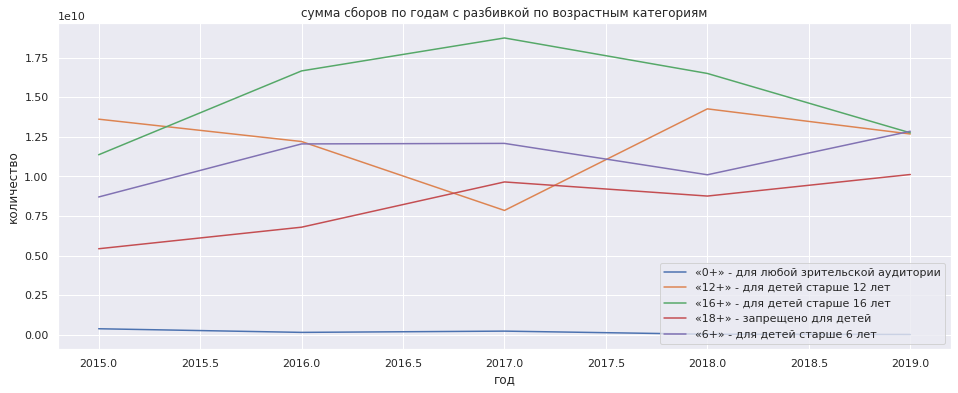

In [ ]:
data_year = data.query("2015 <= year <= 2019") #рассмотрим фильмы в период с 2015 по 2019 год
data_year[data_year['box_office'].notna()] \
    .pivot_table(index='year',
                columns='age_restriction',
                values='box_office',
                aggfunc='sum') \
    .plot(title='сумма сборов по годам с разбивкой по возрастным категориям', kind='line')
plt.xlabel('год')
plt.ylabel('количество')
plt.legend(loc='lower right')

Больше всего денег в прокате собрали фильмы с возрастным ограничением "16+", при чем в 2017 году. Возможно, это связано с тем, что в этот год выходили более кассовые фильмы (например, франшизные фильмы), но и возрастной ценз 16+ охватывает большее количество аудитории. Меньше всего рейтинг у фильмов 0+, такое ограничение присвают очень малому количеству фильмов.



Построим "ящик с усами" по распределению кассовых сборов в зависимости от возрастной категории фильма.

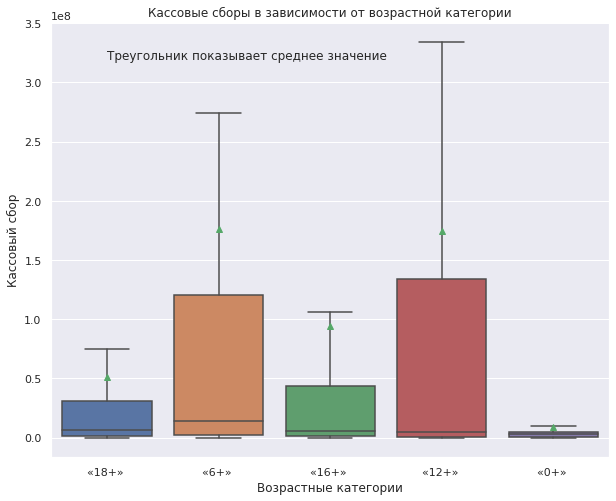

In [ ]:
import seaborn as sns
temp = data.copy()
# для удобства укоротим названия категорий
def get_first_value(s, sep = ','):  # Функция для выбора первого элемента из перечисления
    value_lst = s.split(sep=sep)
    return value_lst[0]

temp['age_restriction'] = temp['age_restriction'].apply(lambda x: get_first_value(x, sep='-'))
# сохраним маску для среза по годам
year_mask = (temp['year'] >= 2015) & (temp['year'] <= 2019)

plt.figure(figsize=(10, 8))
(sns.boxplot(data = temp.loc[year_mask], y = 'box_office', x='age_restriction', showfliers=False, showmeans=True)
    .set(title = 'Кассовые сборы в зависимости от возрастной категории',
         xlabel = 'Возрастные категории', ylabel = 'Кассовый сбор'))
plt.text(0, 3.2e8,'Треугольник показывает среднее значение')
plt.show()

**Промежуточный вывод**

С 2012 по 2016 год количество выходивших фильмов возрастало, в 2017 году фильмов вышло чуть меньше, с 2018 по 2019 года вновь наблюдается увеличение.
Информаци по сборам есть не по всем фильмам, их доля составляет 0.42, больше всего фильмов с информацией о сборах есть в 2019 году, меньше - в 2010 году. Сумма сборов была минимальной в 2010 году, максимальной в 2018 году.
С помощью сводной таблицы посчитали среднюю и медианную сумму сборов для каждого года. С 2010 по 2019 год суммы за сборы увеличивались. Не смотря на то, что среднее изменилось, медианное значение осталось не очень большим. Предположим, что это связано с тем, что было много "средних фильмов" и несколько успешных проектов.
Больше всего собрали в прокате фильмы с рейтингом 16+, особенно в 2017 году. Возможно это свзяно с выходом в тот год кассовых фильмов. Кроме того, возрастной ценз 16+ охватывается большее количество аудитории. Меньшее количество сборов у фильмов с рейтингом 0+, такое ограничение присваивается очень малому количеству фильмов.


## 4. Фильмы, получившие государственную поддержку



Посмотрим на фильмы с государственной поддержкой, и вычислим коэффициент окупаемости по каждому из них. После чего, посмотрим на график с количеством фильмов по жанрам

In [ ]:
#Создадим таблицу с фильмами с государственной поддержкой.
data_support = data[data['support_percentage'].notna()].copy()
data_support['all_support'] = data_support['nonrefundable_support'] + data_support['refundable_support']
#добавим столбец с коэффициентом окупаемости
data_support['ratio_payback'] = data_support['box_office']/data_support['all_support']

data_support

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,financing_source,ratings,genres,box_office,support_percentage,year,main_director,main_genres,all_support,ratio_payback
1281,Пока еще жива,111005313,2013-10-12,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.00,...,Министерство культуры,8.1,"драма, мелодрама","365,353.60",0.33,2013,А.Атанесян,драма,"26,500,000.00",0.01
1448,Бесславные придурки,111003314,2014-03-29,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.00,...,Министерство культуры,без рейтинга,no genres,"28,140.00",0.70,2014,А.Якимчук,no genres,"26,000,000.00",0.00
1498,Невидимки,111004213,2013-09-10,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.00,...,Фонд кино,5.3,"комедия, фантастика","19,957,031.50",0.61,2013,Р.Давлетьяров,комедия,"107,847,945.00",0.19
1524,БЕРЦЫ,111004314,2014-05-06,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.00,...,Министерство культуры,4.2,драма,"55,917.50",0.69,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,"28,000,000.00",0.00
1792,Братья Ч,111004414,2014-04-24,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.00,...,Министерство культуры,6.4,драма,"232,100.00",0.62,2014,М.Угаров,драма,"25,000,000.00",0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,Союз спасения,111022019,2019-12-26,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,"100,000,000.00",...,Фонд кино,6.0,"история, биография, драма","717,703,185.53",0.51,2019,А.Кравчук,история,"500,000,000.00",1.44
7466,Иван Царевич и Серый Волк 4,114005019,2019-12-20,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,"100,000,000.00",...,Фонд кино,6.7,"мультфильм, приключения, семейный","501,069,235.00",0.53,2019,Д.Шмидт,мультфильм,"100,000,000.00",5.01
7474,Вторжение,111022519,2019-12-24,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,"100,000,000.00",...,Фонд кино,5.7,"фантастика, боевик",NaN,0.53,2019,Ф.Бондарчук,фантастика,"500,000,000.00",NaN
7476,Я свободен,111023019,2019-12-26,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.00,...,Министерство культуры,5.9,драма,NaN,0.65,2019,И.Северов,драма,"30,000,000.00",NaN


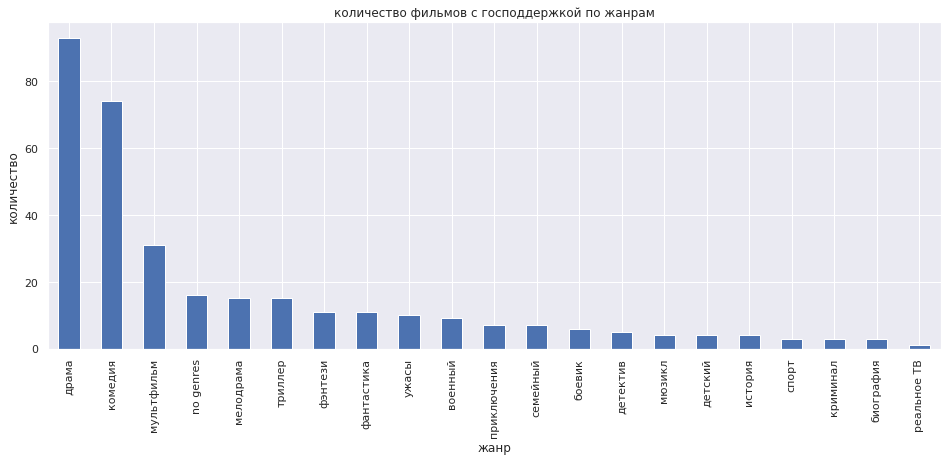

In [ ]:
data_support['main_genres'].value_counts().plot(title='количество фильмов с господдержкой по жанрам', kind='bar')
plt.xlabel('жанр')
plt.ylabel('количество')
plt.show()

Как видим, чаще государство поддерживает драмы, комедии, реже всего - реальное ТВ

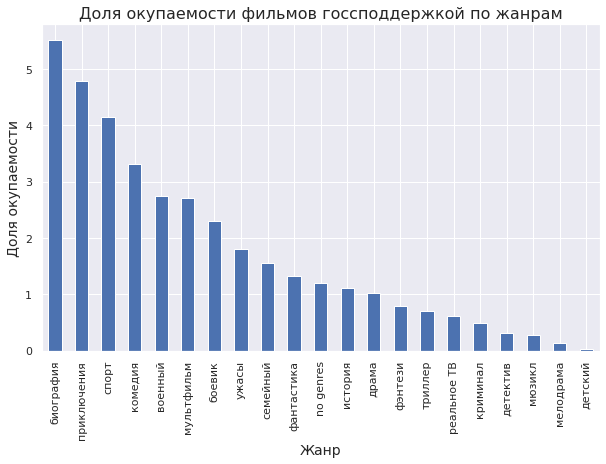

In [ ]:
genre_payback = data_support.groupby('main_genres')['ratio_payback'].mean().sort_values(ascending=False)
genre_payback.plot(kind='bar', figsize=(10,6))
plt.title('Доля окупаемости фильмов госсподдержкой по жанрам', fontsize=16)
plt.xlabel('Жанр', fontsize=14)
plt.ylabel('Доля окупаемости', fontsize=14)
plt.show()

Господдержка окупается больше всего у фильмов жанра Драма, далее идут Комедия, меньшая доля окупаемости у фильмов жанра музыка, детский, спорт, реальное ТВ.

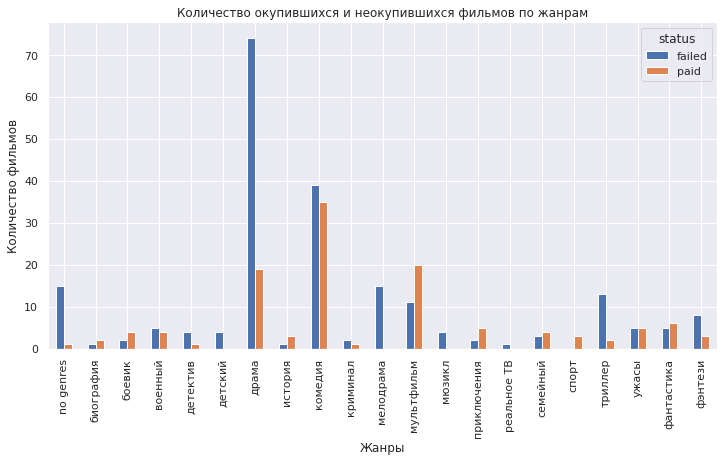

In [ ]:
# Создадим новый столбец «статус» на основе столбца «ratio_payback»
# Коэффициент окупаемости 1 или выше означает, что фильм был успешным, в противном случае он провалился
data_support['status'] = ['paid' if x >= 1 else 'failed' for x in data_support['ratio_payback']]
grouped = data_support.groupby(['main_genres', 'status']).size().unstack()
ax = grouped.plot(kind='bar', figsize=(12,6))
ax.set_title('Количество окупившихся и неокупившихся фильмов по жанрам')
ax.set_xlabel('Жанры')
ax.set_ylabel('Количество фильмов')
plt.show()

Посмотрим на общую и среднюю рентабельность жанра

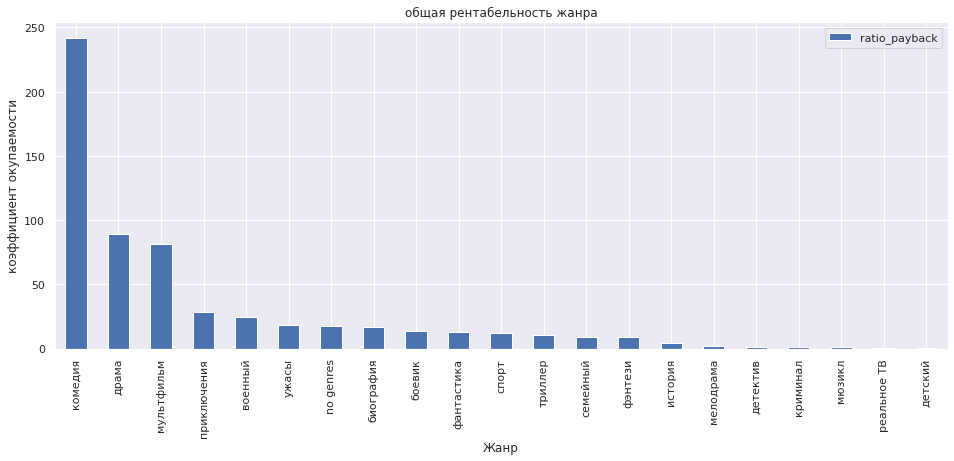

In [ ]:
data_support.groupby('main_genres') \
            .agg('sum') \
            .sort_values(by='ratio_payback',
                         ascending=False) \
            .plot(title='общая рентабельность жанра',
                  kind='bar',
                  stacked=True,
                  y='ratio_payback')
plt.xlabel('Жанр')
plt.ylabel('коэффициент окупаемости')
plt.show()

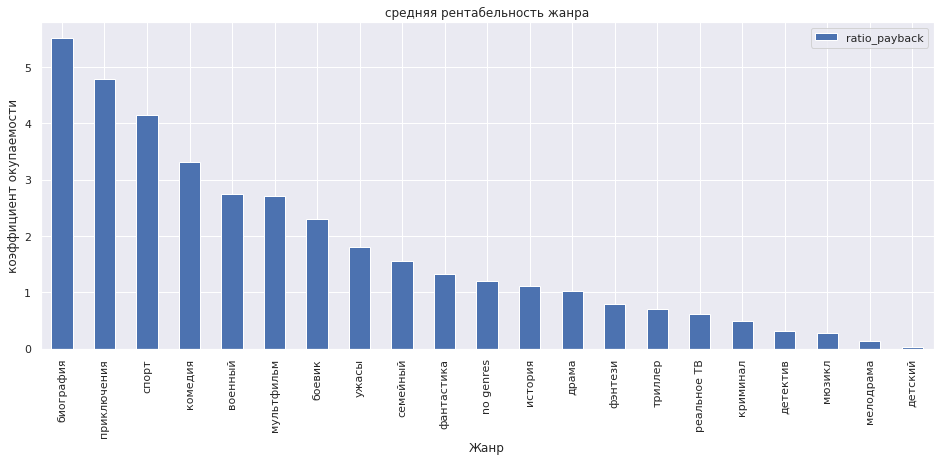

In [ ]:
data_support.groupby('main_genres') \
            .agg('mean') \
            .sort_values(by='ratio_payback',
                         ascending = False) \
            .plot(title='средняя рентабельность жанра',
                  kind='bar',
                  stacked=True,
                  y='ratio_payback')
plt.xlabel('Жанр')
plt.ylabel('коэффициент окупаемости')
plt.show()

**Промежуточный вывод**

Чаще всего государство оказывает поддержку фильмам с жанрами драма, комедии, боевик; меньше всего - реальное тв, фильм-нуар, для взрослых, вестерн, музыка спорт. Большая доля окупаемости у фильмов жанра музыка, детский.
Из диаграммы количества окупаемости и неокупаемости фильмов видим, что из фильмов жанра драма окупилось меньше половины, да и в целом фильмы с государственной поддержкой не очень окупаемы.
Посмотрев на общую картину, видим, что самым рентабельным жанром с большим отрывом является комедия, однако в усредненном значении данные меняются, комедия уходит на четвертое место, а на первом месте по рентабельности становится биография. Самые нерентабельными являются детские фильмы.

##  Общий вывод

В ходе работы мы обработали два датасета, соединив их в один; изменили тип данных, где это было необходимо, очистили ненужные данные и, по необходимости, заменили медианным значением. Нашли закономерность по количеству пропусков в столбцах с объемом возвратных средств, объемом невозвращенных средств государству, общий бюджет фильма и источник гос.финансирования. Это связано с тем, что у данные фильмы не поддерживались государством. Посмотрев на дубликаты, установили, что только дубликаты в столбце с номером прокатного удостоверения необходимо удалить, так как номер прокатного удостоверения - уникальное значение. Дубликаты в названиях фильма могут встречаться из-за того, что либо название разныех фильмов может совпадать, либо это ремейк фильно, перевыпуск его или ротация в кинотеатрах и ТВ, с дубликатами по странам, режиссерам, жанрам, рейтингам и даты проката - все понятно, они могут повторяться.

Для более полного и удобного исследования мы добавили новые столбцы: режиссер, год проката фильма, основно жанр, категория рейтинга, доля государственной поддержки.

В ходе исследования фильмов с государственной поддержкой обнаружили, что в период с 2012 по 2016 год количество выпущенных фильмов увеличилось, с небольшим снижением в 2017 году, после чего снова увеличилось с 2018 по 2019 год. Около 42% фильмов имеют информацию о кассовых сборах, причем большинство из них с 2019 года и немного с 2010 года. В целом заработок увеличился с 2010 по 2019 год. Средние сборы  рассчитывались для каждого года с использованием сводной таблицы, и хотя среднее значение изменилось, медиана оставалась относительно небольшой, что, возможно, указывает на больше количество средних фильмов и небольшого количетсва успешных. Фильмы с рейтингом 16+ были самыми прибыльными, и в 2017 году было выпущено много успешных фильмов. Жанры, поддерживаемые государством, включали драму, комедию и боевик, в то время как реальное телевидение, фильм-нуар, взрослый, вестерн и спорт имели наименьшую поддержку.Комедии были самым прибыльным жанром в целом, но биографии имели самую высокую среднюю прибыль, а детские фильмы были наименее прибыльными.